In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
sns.set(font_scale=1.3, style='ticks')


In [2]:
#Specify number of replicates (crosses) and model/results folders

num_crosses = 4
train_dir = '/home/drk/seqnn/data/models/v2'

#Padding for drawing text annotations within plots
eps = 0.05


In [3]:
#Read target descriptions

fold3_acc_file = '%s/f3c0/testg-0/acc.txt' % (train_dir)
fold3_acc_df = pd.read_csv(fold3_acc_file, sep='\t', index_col=0).reset_index(drop=True)

#Get experimental assay types
descriptions = fold3_acc_df.description
experiments = pd.Series([desc.split(':')[0] for desc in descriptions])
experiments.value_counts()


RNA    955
dtype: int64

In [4]:
#Get a mask of RNA-only targets
rna_mask = (experiments=='RNA')


In [5]:
#Read test set accuracies

cross_pearsonr = []
cross_npearsonr = []

#Load per-cross performance (replicates)
for ci in range(num_crosses):
    cross_acc_file = '%s/f3c%d/testg-0/acc.txt' % (train_dir, ci)
    cross_acc_df = pd.read_csv(cross_acc_file, sep='\t', index_col=0)
    
    #Store gene-level Pearson correlation
    cross_pearsonr.append(cross_acc_df.pearsonr)
    
    #Store mean-subtracted, quantile-normalized Pearson correlation
    cross_npearsonr.append(cross_acc_df.pearsonr_norm)

#Load ensemble performance (store as last cross)
cross_acc_file = '%s/f3c0/testg-0/acc_ens.txt' % train_dir
cross_acc_df = pd.read_csv(cross_acc_file, sep='\t', index_col=0)
cross_pearsonr.append(cross_acc_df.pearsonr)
cross_npearsonr.append(cross_acc_df.pearsonr_norm)

cross_pearsonr = np.array(cross_pearsonr)
cross_npearsonr = np.array(cross_npearsonr)

#Average across replicates
mean_pearsonr = cross_pearsonr[:-1, :].mean(axis=0)
mean_npearsonr = cross_npearsonr[:-1, :].mean(axis=0)

#Get ensemble performance
ens_pearsonr = cross_pearsonr[-1:, :].mean(axis=0)
ens_npearsonr = cross_npearsonr[-1:, :].mean(axis=0)


In [6]:
#Print per-replicate performance (last entry is ensemble)
cross_pearsonr.mean(axis=1)


array([0.85758206, 0.86303   , 0.8597003 , 0.86079997, 0.86912008])

In [7]:
#Print per-replicate specificity performance (last entry is ensemble)
cross_npearsonr.mean(axis=1)


array([0.54937062, 0.54847185, 0.54767682, 0.54585752, 0.57540829])

## RNA

In [8]:
#Check outliers
len(np.nonzero(mean_pearsonr[rna_mask] < 0.75)[0])


8

In [9]:
#Check outliers
len(np.nonzero(mean_pearsonr[rna_mask] > 0.92)[0])


0

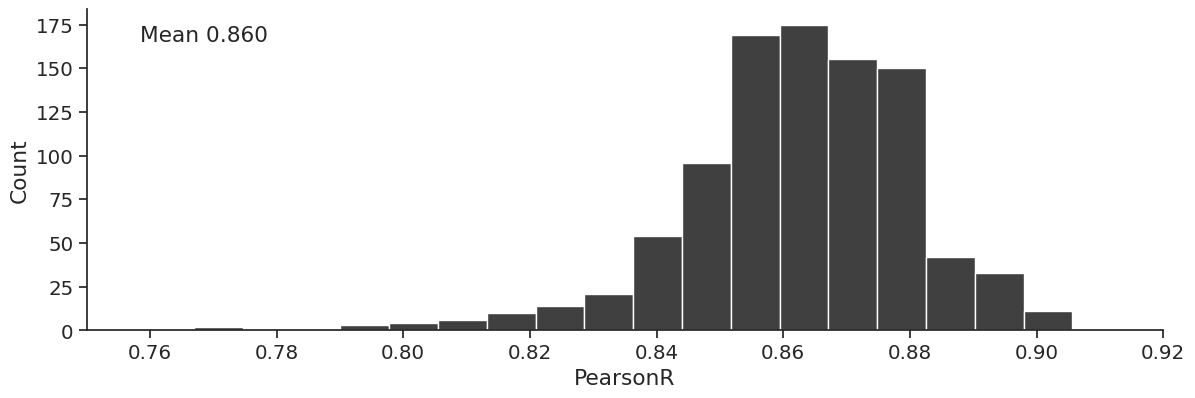

In [10]:
#Plot distribution of gene-level test set pearson correlations (average of 4 replicates)
keep_index = np.nonzero((mean_pearsonr[rna_mask] >= 0.75) & (mean_pearsonr[rna_mask] <= 0.92))[0]

sns.displot(mean_pearsonr[rna_mask][keep_index], bins=20, aspect=3, height=4, color='black')
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_pearsonr[rna_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)
plt.xlim(0.75, 0.92)

plt.savefig('genes_hist_updated_mean.pdf')


In [11]:
#Check outliers
len(np.nonzero(ens_pearsonr[rna_mask] < 0.75)[0])


7

In [12]:
#Check outliers
len(np.nonzero(ens_pearsonr[rna_mask] > 0.92)[0])


0

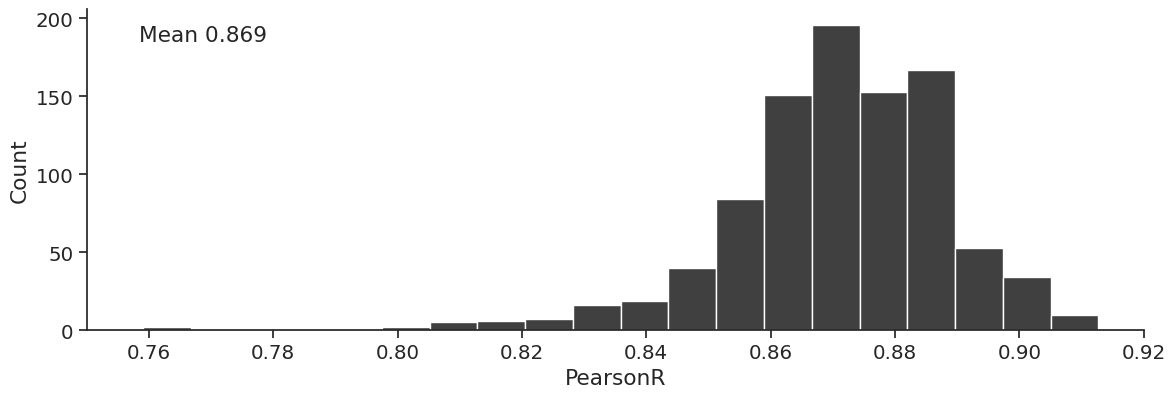

In [13]:
#Plot distribution of gene-level test set pearson correlations (ensemble)
keep_index = np.nonzero((ens_pearsonr[rna_mask] >= 0.75) & (ens_pearsonr[rna_mask] <= 0.92))[0]

sns.displot(ens_pearsonr[rna_mask][keep_index], bins=20, aspect=3, height=4, color='black')
plt.gca().set_xlabel('PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % ens_pearsonr[rna_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)
plt.xlim(0.75, 0.92)

plt.savefig('genes_hist_updated_ens.pdf')


In [15]:
#Check outliers
len(np.nonzero(mean_npearsonr[rna_mask] < 0.30)[0])


2

In [16]:
#Check outliers
len(np.nonzero(mean_npearsonr[rna_mask] > 0.80)[0])


1

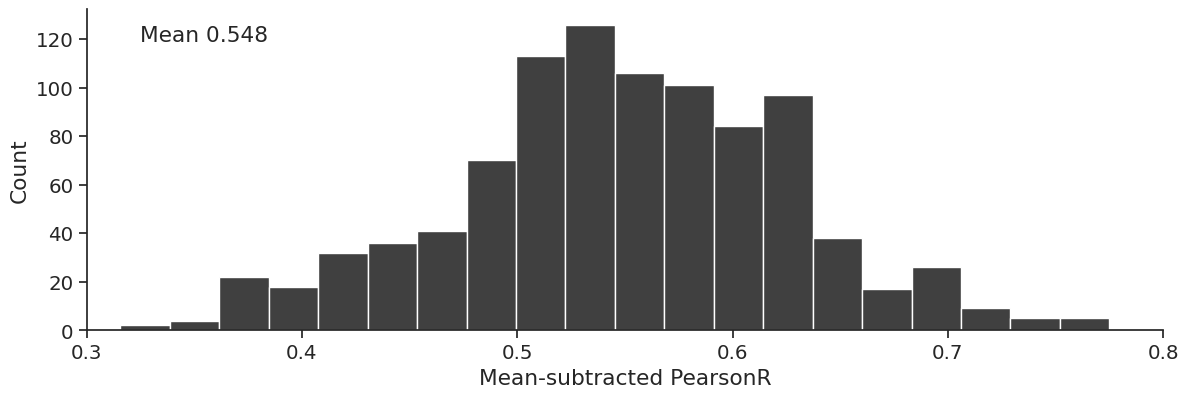

In [17]:
#Plot distribution of mean-subtracted, quantile-normalized gene-level test set pearson correlations (average of 4 replicates)
keep_index = np.nonzero((mean_npearsonr[rna_mask] >= 0.30) & (mean_npearsonr[rna_mask] <= 0.80))[0]

sns.displot(mean_npearsonr[rna_mask][keep_index], bins=20, aspect=3, height=4, color='black')
plt.gca().set_xlabel('Mean-subtracted PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % mean_npearsonr[rna_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)
plt.xlim(0.30, 0.80)

plt.savefig('genes_nhist_updated_mean.pdf')


In [18]:
#Check outliers
len(np.nonzero(ens_npearsonr[rna_mask] < 0.30)[0])


2

In [19]:
#Check outliers
len(np.nonzero(ens_npearsonr[rna_mask] > 0.80)[0])


1

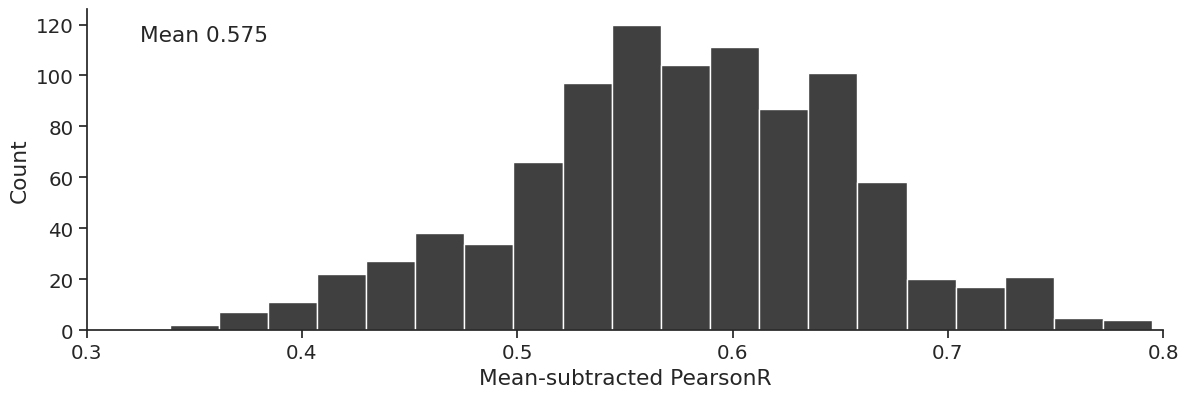

In [20]:
#Plot distribution of mean-subtracted, quantile-normalized gene-level test set pearson correlations (ensemble)
keep_index = np.nonzero((ens_npearsonr[rna_mask] >= 0.30) & (ens_npearsonr[rna_mask] <= 0.80))[0]

sns.displot(ens_npearsonr[rna_mask][keep_index], bins=20, aspect=3, height=4, color='black')
plt.gca().set_xlabel('Mean-subtracted PearsonR')
plt.gca().text(eps, 1-eps, 'Mean %.3f' % ens_npearsonr[rna_mask].mean(), 
               verticalalignment='top', transform=plt.gca().transAxes)
plt.xlim(0.30, 0.80)

plt.savefig('genes_nhist_updated_ens.pdf')
